In [1]:
from google.colab import drive  
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd

In [5]:
PATH='/content/gdrive/MyDrive/개인 공부/dacon/dacon_energy/dacon_energy'

In [6]:
train = pd.read_csv(PATH + '/train.csv', encoding='cp949', header=0)
mis_test = pd.read_csv(PATH + '/test.csv', encoding='cp949', header=0)
sub = pd.read_csv(PATH + '/sample_submission.csv', encoding='cp949')

In [7]:
train.columns = ['num','datetime','power(kWh)','tempe(°C)','wind(m/s)','hum(%)','rain(mm)','sol(hr)','ne_cool','sol_energy']
mis_test.columns = ['num','datetime','tempe(°C)','wind(m/s)','hum(%)','rain(mm)','sol(hr)','ne_cool','sol_energy']

# 추세 뽑기

In [8]:
# 건물별로 그룹 만들기
train_power = train[['num','datetime','power(kWh)']]
dict_1 = dict(list(train_power.groupby("num")))

In [9]:
decomposed_Data = dict_1[1][['datetime','power(kWh)']]

In [10]:
d_t1 = decomposed_Data.iloc[:,[1]]
date1 =  pd.DatetimeIndex(decomposed_Data['datetime'])
d_t1 = pd.DataFrame(data = d_t1, columns = ['power(kWh)'])
#d_t1 = d_t1.reset_index()
d_t1 = d_t1.set_index(date1)
d_t1.head()

,power(kWh)
datetime,
2020-06-01 00:00:00,8179.056
2020-06-01 01:00:00,8135.640
2020-06-01 02:00:00,8107.128
2020-06-01 03:00:00,8048.808
2020-06-01 04:00:00,8043.624


In [11]:
d_t1.index

DatetimeIndex(['2020-06-01 00:00:00', '2020-06-01 01:00:00',
               '2020-06-01 02:00:00', '2020-06-01 03:00:00',
               '2020-06-01 04:00:00', '2020-06-01 05:00:00',
               '2020-06-01 06:00:00', '2020-06-01 07:00:00',
               '2020-06-01 08:00:00', '2020-06-01 09:00:00',
               ...
               '2020-08-24 14:00:00', '2020-08-24 15:00:00',
               '2020-08-24 16:00:00', '2020-08-24 17:00:00',
               '2020-08-24 18:00:00', '2020-08-24 19:00:00',
               '2020-08-24 20:00:00', '2020-08-24 21:00:00',
               '2020-08-24 22:00:00', '2020-08-24 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=2040, freq=None)

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
result_decom = seasonal_decompose(d_t1[['power(kWh)']], model = 'additive')

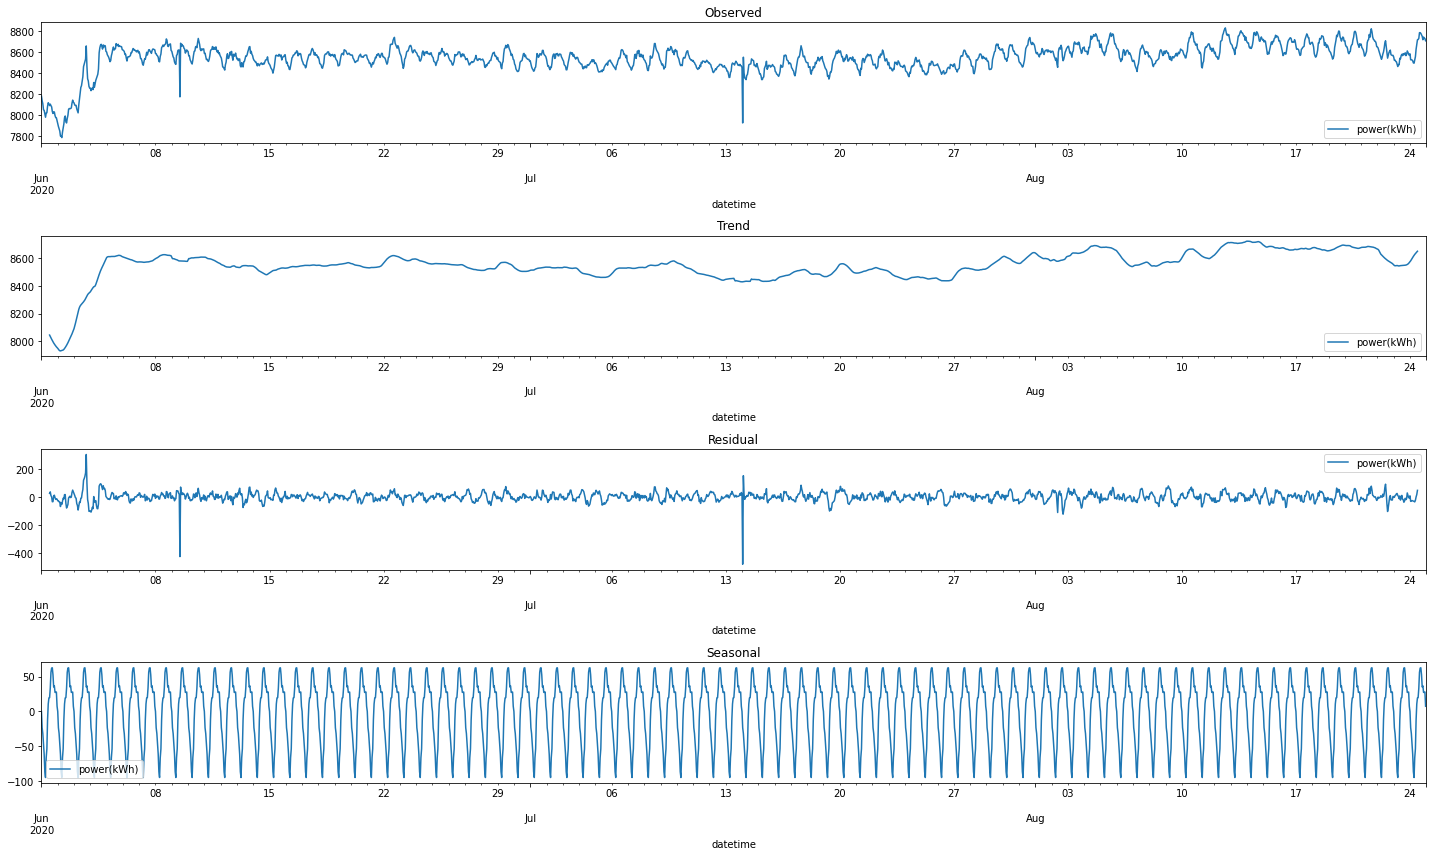

In [15]:
from matplotlib import pyplot as plt
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
result_decom.observed.plot(ax=ax1, title='Observed')
result_decom.trend.plot(ax=ax2, title='Trend')
result_decom.resid.plot(ax=ax3, title='Residual')
result_decom.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()

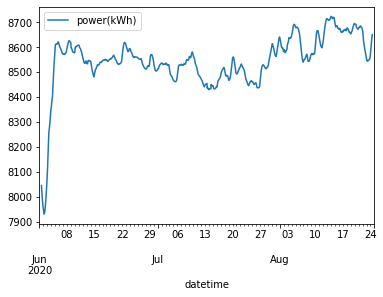

In [16]:
result_decom.trend.plot()

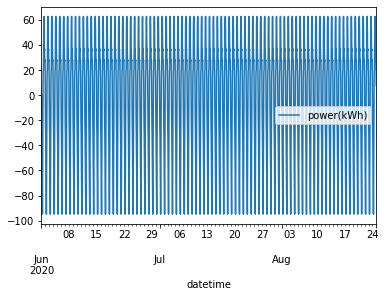

In [17]:
result_decom.seasonal.plot()

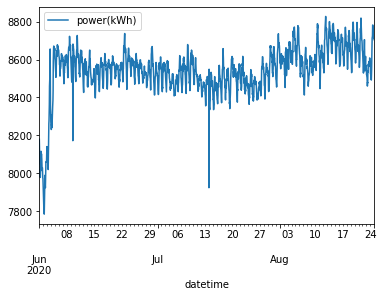

In [18]:
result_decom.observed.plot()

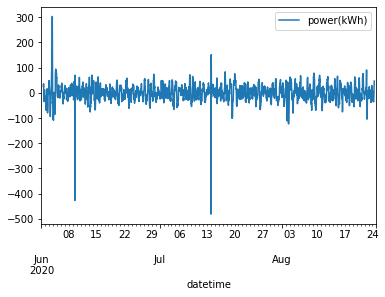

In [19]:
result_decom.resid.plot()